<a href="https://colab.research.google.com/github/umas-iit/Algorithms/blob/main/AI_ImageClassification_Practice2_CNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN Image Classification with Keras and CIFAR-10

## Step 1: Choose a Dataset

* Choose a dataset for the image classification task. There are many publicly available datasets, such as CIFAR-10, CIFAR-100, and MNIST, that can be used for training and testing the CNN.
* Use the CIFAR-10 dataset, which consists of 60,000 32×32 color images across ten classes, with 6,000 images in each class.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

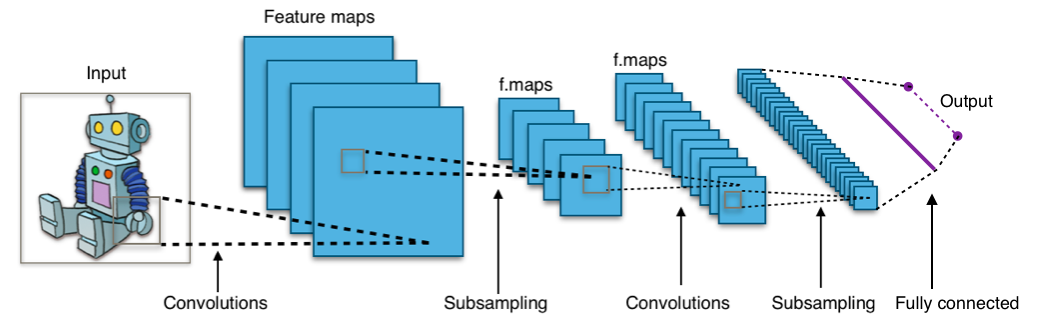

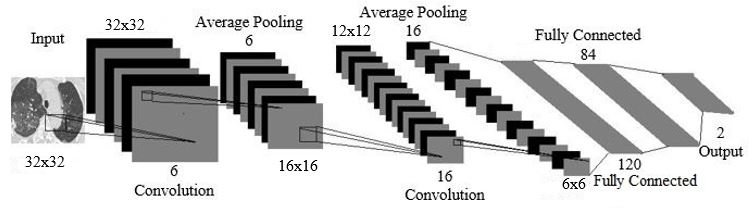

## Step 2: Prepare the Dataset for Training

* Load the CIFAR-10 dataset and prepare it for training. This involves splitting the dataset into training and test sets, and then normalizing the pixel values of the images to the range of 0 to 1.

In [ ]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


## Step 3: Create Training Data and Assign Labels

* Use the training set of images and labels to train the CNN.
* Use the flow_from_directory() method from the keras.preprocessing.image module to create a generator that will read the images from the directory and apply data augmentation.
* Assign labels to the data by converting the categorical class labels to one-hot encoded vectors.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Step 4: Define and Train the CNN Model

* Define the CNN architecture using the Keras library. The model will consist of several convolutional layers followed by max pooling layers, and a fully connected layer with a softmax activation function.
* Train the model using the fit() method.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

NameError: ignored

## Step 5: Test the Model’s Accuracy

Evaluate the trained model on the test set using the evaluate() method and calculate the accuracy of the model.

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")